In [7]:
import astropy.units as u
import sunpy.map
import sunpy.data.sample  
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import make_lupton_rgb

In [2]:
# Load in the sample data
aia211 = sunpy.map.Map(sunpy.data.sample.AIA_211_IMAGE) 
aia193 = sunpy.map.Map(sunpy.data.sample.AIA_193_IMAGE) 
aia171 = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE) 

In [3]:
# A simple asinh stretch function
def asinhstch(x,a=1):
    return (np.arcsinh(x/a)/np.arcsinh(1/a))

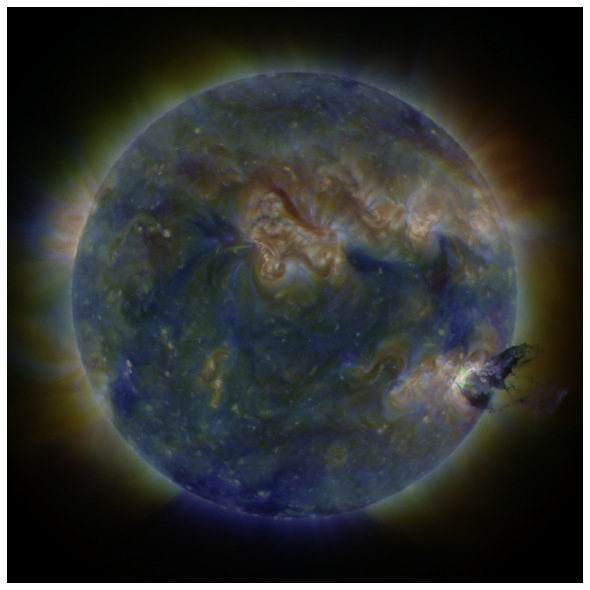

In [26]:
mpr=aia211.resample([2000,2000]*u.pixel)
mpg=aia193.resample([2000,2000]*u.pixel)
mpb=aia171.resample([2000,2000]*u.pixel)

dr=mpr.data
dg=mpg.data
db=mpb.data

dr[dr<0]=0
dr[dr>0]=dr[dr>0]/np.mean(dr[dr>0])
dg[dg<0]=0
dg[dg>0]=dg[dg>0]/np.mean(dg[dg>0])
db[db<0]=0
db[db>0]=db[db>0]/np.mean(db[db>0])

fig = plt.figure(figsize=(8,8))
ax = plt.axes([0, 0, 1, 1])
ax.set_axis_off()
rgb=np.zeros([len(dr[:,0]),len(dr[:,0]),3])
# Later data might just need a=1 and not additional pow scaling, so rgb**1.0
rgb[:,:,0]=asinhstch(dr,0.5)
rgb[:,:,1]=asinhstch(dg,0.5)
rgb[:,:,2]=asinhstch(db,0.5)
rgb=rgb/np.max(rgb)
rgb=rgb**.9
im = ax.imshow(rgb,alpha=1,origin="lower")
plt.show()

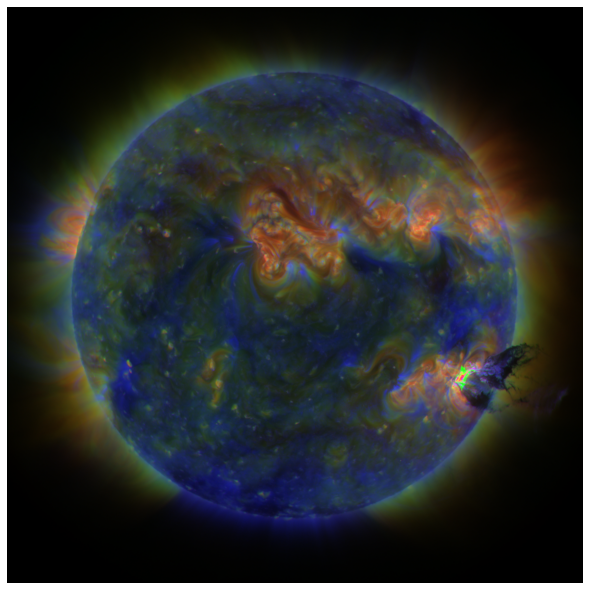

In [21]:
# This is the astropy was, needs lots of tweaking of Q and stretch
# Not sure if actually nicer than the above simplier approach
lp_full_rgb = make_lupton_rgb(dr,dg,db,Q=8,stretch=4)

fig = plt.figure(figsize=(8,8))
ax = plt.axes([0, 0, 1, 1])
ax.set_axis_off()
im = ax.imshow(lp_full_rgb,origin="lower")
plt.show()